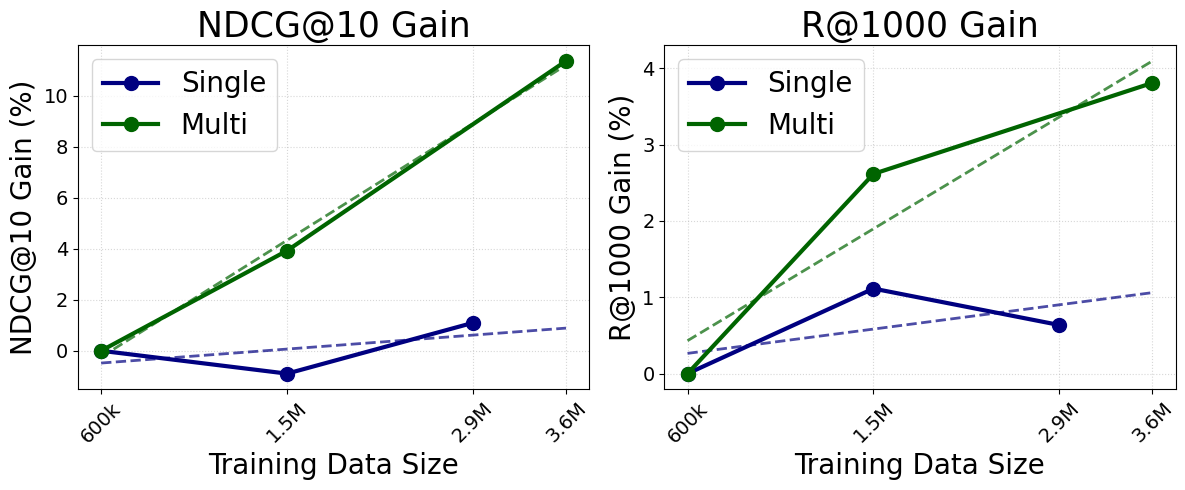

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from scipy.stats import linregress

df = pd.read_csv("data.csv")

# Prepare data
modes = ['single', 'multi']
metrics = ['NDCG@10', 'R@1000']
data_sizes = ['600k', '1.5M', '2.9M', '3.6M']

# Custom x-coordinates to make 2.9M and 3.6M closer
x_indices = [0, 1, 2, 2.5]

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colors for modes
colors = {'single': 'navy', 'multi': 'darkgreen'}

# Plot for each metric
for j, metric in enumerate(metrics):
    ax = axes[j]
    
    for mode in modes:
        # Filter data for current mode
        mode_data = df[df['mode'] == mode]
        # Reindex to include all data sizes, filling missing with NaN
        mode_data = mode_data.set_index('data size').reindex(data_sizes).reset_index()
        values = mode_data[metric].values
        
        # Calculate percentage gain relative to 600k
        baseline = mode_data[mode_data['data size'] == '600k'][metric].values[0]
        perc_gain = (values - baseline) / baseline * 100
        
        # Plot line chart for percentage gain (skip NaN values)
        valid_mask = ~np.isnan(perc_gain)
        ax.plot(np.array(x_indices)[valid_mask], perc_gain[valid_mask], marker='o', 
                linewidth=3, markersize=10, label=f'{mode.capitalize()}', 
                color=colors[mode])
        
        # Calculate and plot trend line (only for valid data points)
        valid_x = np.array(x_indices)[valid_mask]
        valid_y = perc_gain[valid_mask]
        if len(valid_x) > 1:  # Need at least 2 points for regression
            slope, intercept, _, _, _ = linregress(valid_x, valid_y)
            trend_line = slope * np.array(x_indices) + intercept
            ax.plot(x_indices, trend_line, linestyle='--', linewidth=2, color=colors[mode], alpha=0.7)
    
    # Customize subplot
    ax.set_xlabel('Training Data Size', fontsize = 20)
    ax.set_ylabel(f'{metric} Gain (%)', fontsize = 20)
    ax.set_title(f'{metric} Gain', fontsize = 25)
    ax.legend(fontsize = 20)
    ax.grid(True, linestyle=':', alpha=0.5)  # Lighter, dotted grid
    ax.set_xticks(x_indices)
    ax.set_xticklabels(data_sizes, rotation=45)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.savefig("performance_gain_multi_vs_single.pdf")
plt.show()